## Futures

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
future_contract = symbols('NGF18')

In [45]:
# to look at all the properties in the futures_contract object
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    # print('\n')

multiplier
10000.0
exchange_info
ExchangeInfo('NYMEX', 'NYMEX', 'US')
sid
1061201801
symbol
NGF18
asset_name
Natural Gas
tick_size
0.001
exchange
NYMEX
auto_close_date
2017-12-22 00:00:00+00:00
root_symbol
NG
notice_date
2017-12-28 00:00:00+00:00
end_date
2017-12-27 00:00:00+00:00
expiration_date
2017-12-27 00:00:00+00:00
start_date
2010-08-24 00:00:00+00:00
first_traded
None
exchange_full
NYMEX


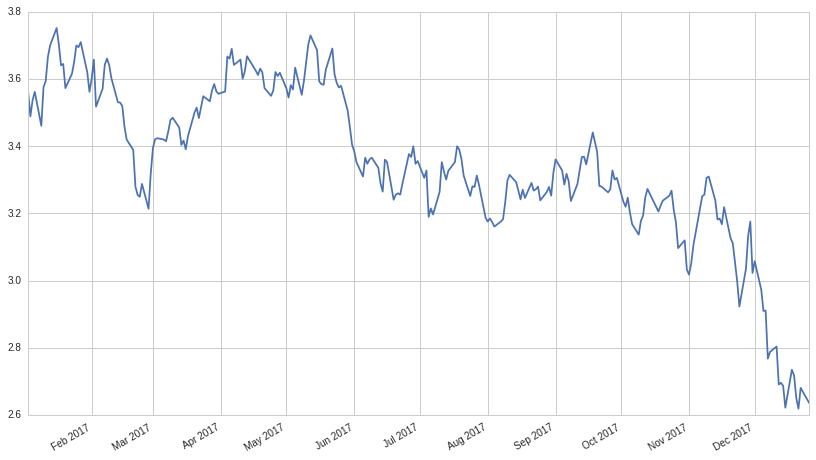

In [47]:
# no futures pricing information available so can't do the graph
futures_position_value = get_pricing(future_contract, start_date='2017-01-01', 
                                     end_date='2017-12-26', fields='price')

futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()

In [32]:
from quantopian.research.experimental import history

In [34]:
print(history.__doc__)


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}.

    start : str or pd.Timestamp
        String or Timestamp representing a start date or start intraday minute
        for the returned data.

    end : str or pd.Timestamp
        String or Timestamp representing an end date or end intraday minute for
        the returned data.

    frequency : {'daily', 'minute'}
        Resolution of the data to be returned.

    symbol_reference_date : str or pd.Timestamp, optional
        String 

In [49]:
ngf18 = future_contract

In [56]:
ngf18_data = history(ngf18, fields=['price', 'open_price', 'high', 'low',
                     'close_price', 'volume', 'contract'],
                    frequency='daily',
                    start='2017-02-01',
                    end='2017-04-01')

In [52]:
# gotta use old stuff not actual futures
ngf18_data.head()

,price,open_price,high,low,close_price,volume,contract
2017-01-03 00:00:00+00:00,3.560,3.668,3.673,3.529,3.560,612.0,Future(1061201801 [NGF18])
2017-01-04 00:00:00+00:00,3.489,3.566,3.572,3.483,3.489,857.0,Future(1061201801 [NGF18])
2017-01-05 00:00:00+00:00,3.537,3.489,3.565,3.447,3.537,1254.0,Future(1061201801 [NGF18])
2017-01-06 00:00:00+00:00,3.562,3.518,3.605,3.497,3.562,816.0,Future(1061201801 [NGF18])
2017-01-09 00:00:00+00:00,3.461,3.565,3.565,3.455,3.461,627.0,Future(1061201801 [NGF18])


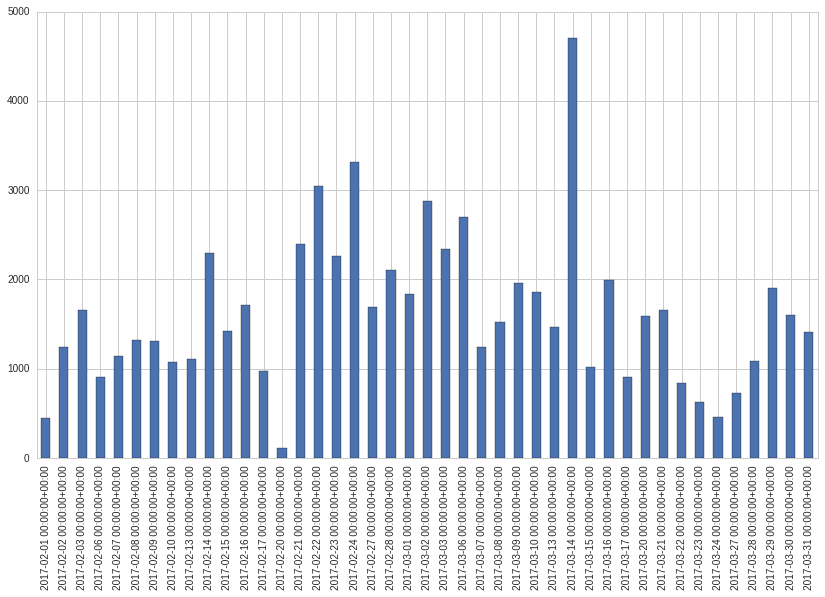

In [57]:
ngf18_data['volume'].plot(kind='bar')

In [58]:
ng_contracts = symbols(['NGF18','NGG18','NGH18','NGJ18','NGK18','NGM18'])

In [59]:
ng_consecutive_contract_volume = history(ng_contracts, fields='volume', frequency='daily',
                                        start='2017-01-01', end='2018-07-01')

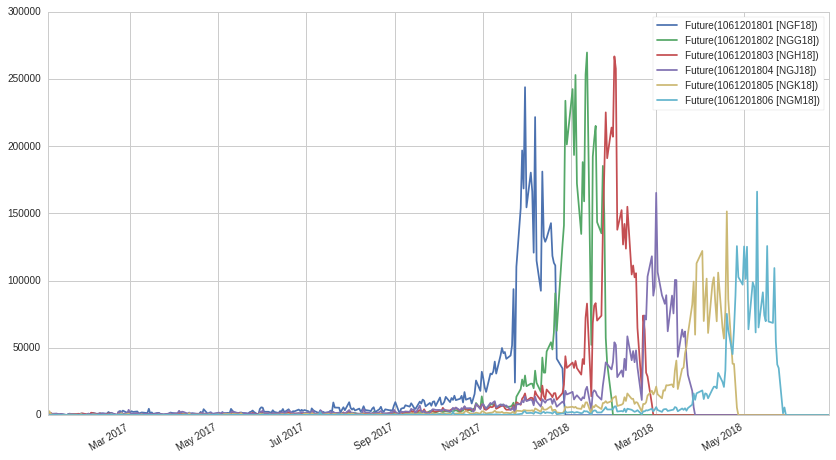

In [60]:
ng_consecutive_contract_volume.plot()

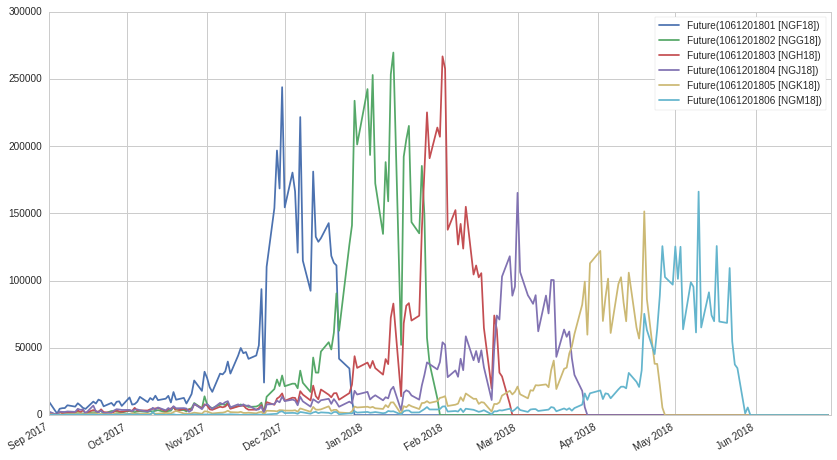

In [61]:
ng_consecutive_contract_volume.plot(xlim=['2017-09-01', '2018-06-30'])

## Futures - Part 2

In [62]:
# turning consecutive data elements like the different month NG futures
# into a continuous data element via abstraction
from quantopian.research.experimental import continuous_future

In [63]:
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


In [64]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')

In [65]:
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [66]:
ng_cont_active = history(continuous_ng, fields=['contract', 'price', 'volume'],
                        frequency='daily', start='2017-09-01', end='2018-07-01')

In [67]:
ng_cont_active.head()

,price,volume,contract
2017-09-01 00:00:00+00:00,3.171,130413.0,Future(1061201710 [NGV17])
2017-09-04 00:00:00+00:00,3.123,17969.0,Future(1061201710 [NGV17])
2017-09-05 00:00:00+00:00,3.075,114790.0,Future(1061201710 [NGV17])
2017-09-06 00:00:00+00:00,3.110,91510.0,Future(1061201710 [NGV17])
2017-09-07 00:00:00+00:00,3.079,99430.0,Future(1061201710 [NGV17])


In [68]:
ng_cont_active['contract'].unique()

array([Future(1061201710 [NGV17]), Future(1061201711 [NGX17]),
       Future(1061201712 [NGZ17]), Future(1061201801 [NGF18]),
       Future(1061201802 [NGG18]), Future(1061201803 [NGH18]),
       Future(1061201804 [NGJ18]), Future(1061201805 [NGK18]),
       Future(1061201806 [NGM18]), Future(1061201807 [NGN18]),
       Future(1061201808 [NGQ18])], dtype=object)

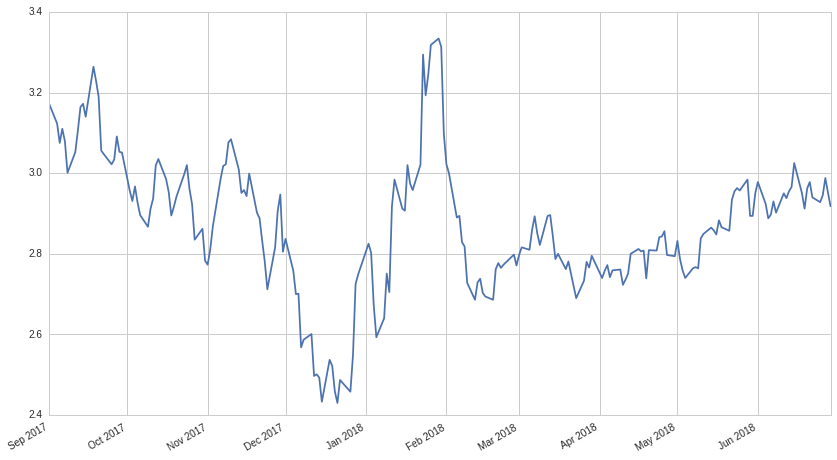

In [69]:
ng_cont_active['price'].plot()

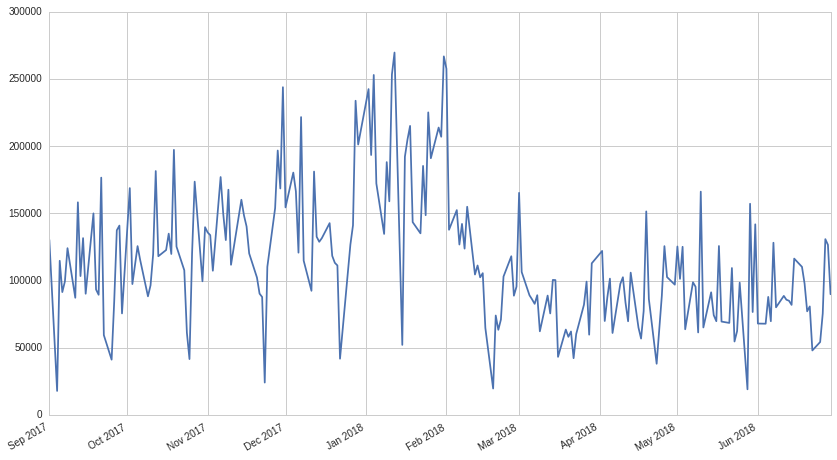

In [70]:
ng_cont_active['volume'].plot()

In [71]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily',
                                         start='2017-09-01', 
                                         end='2018-07-01')

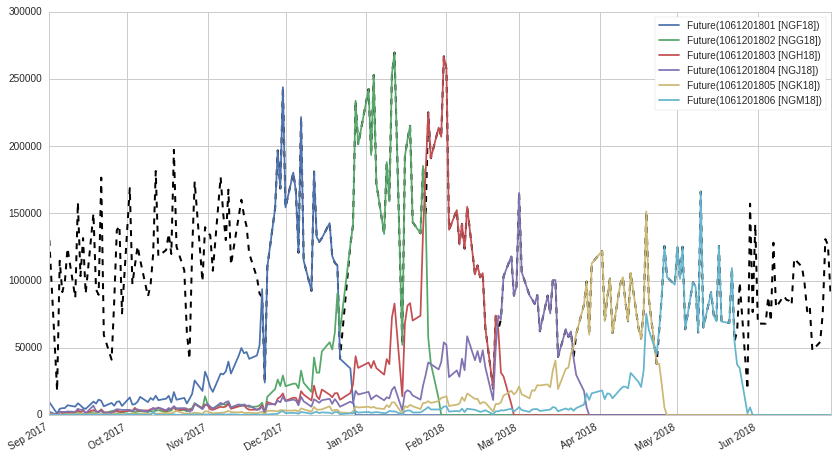

In [74]:
ax = ng_cont_active['volume'].plot(ls='--', c='black', lw=2)
ng_consecutive_contract_volume.plot(ax=ax)

In [75]:
ng_consecutive_contract_price = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily',
                                         start='2017-09-01', 
                                         end='2018-07-01')

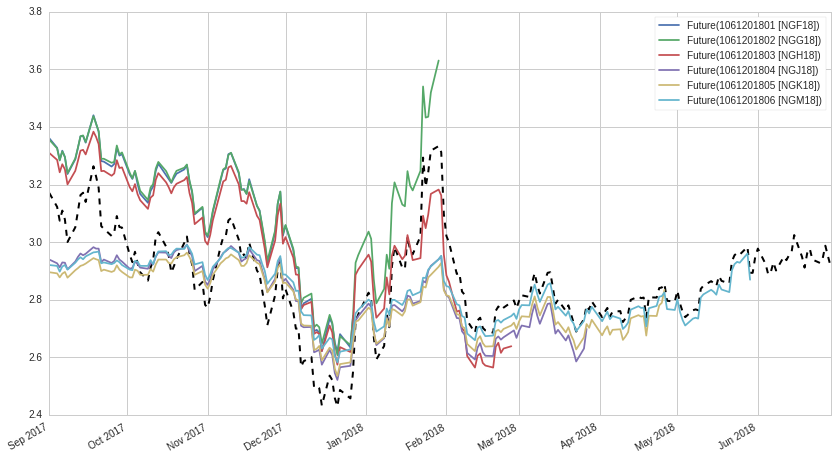

In [76]:
ax = ng_cont_active['price'].plot(ls='--', c='black', lw=2)
ng_consecutive_contract_price.plot(ax=ax)

In [77]:
continuous_ng_unadj = continuous_future('NG', offset=0, roll='volume', adjustment=None)

In [78]:
ng_unadj_history = history(continuous_ng_unadj, 
                                         fields=['contract','price'], 
                                         frequency='daily',
                                         start='2017-09-01', 
                                         end='2018-07-01')

In [79]:
ng_unadj_history.head()

,price,contract
2017-09-01 00:00:00+00:00,3.065,Future(1061201710 [NGV17])
2017-09-04 00:00:00+00:00,3.018,Future(1061201710 [NGV17])
2017-09-05 00:00:00+00:00,2.972,Future(1061201710 [NGV17])
2017-09-06 00:00:00+00:00,3.006,Future(1061201710 [NGV17])
2017-09-07 00:00:00+00:00,2.976,Future(1061201710 [NGV17])


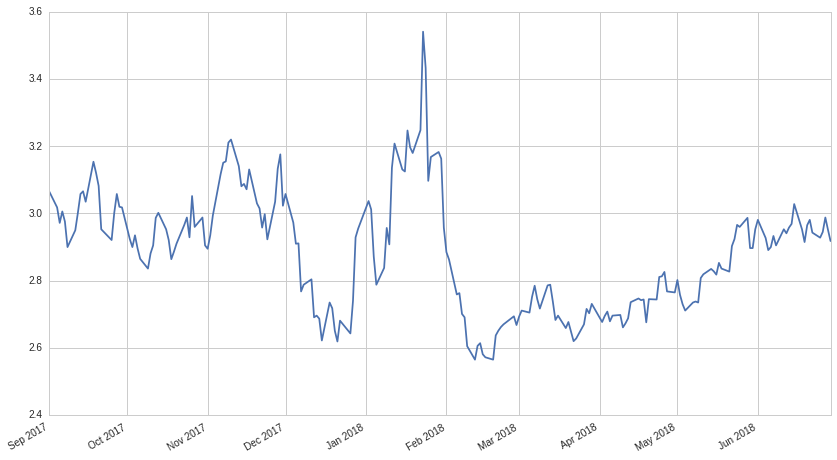

In [80]:
ng_unadj_history['price'].plot()

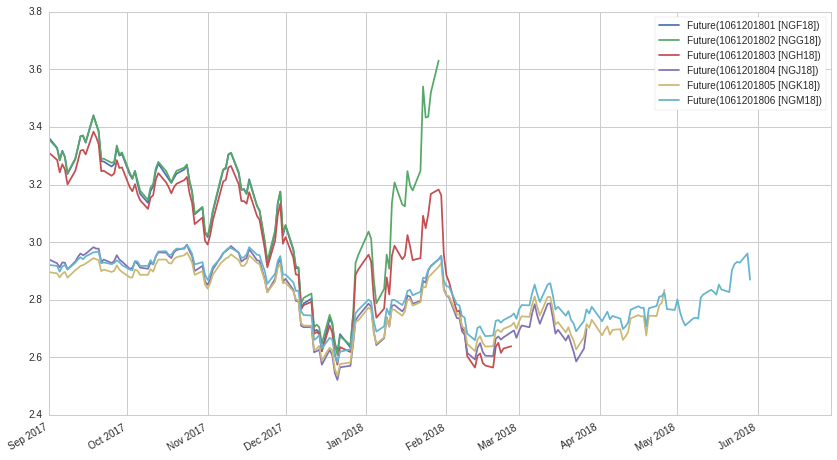

In [81]:
ng_consecutive_contract_price.plot()

In [82]:
pivot_unadj = ng_unadj_history.pivot(index=ng_unadj_history.index, columns='contract')

In [83]:
ng_unadj_history.head()

,price,contract
2017-09-01 00:00:00+00:00,3.065,Future(1061201710 [NGV17])
2017-09-04 00:00:00+00:00,3.018,Future(1061201710 [NGV17])
2017-09-05 00:00:00+00:00,2.972,Future(1061201710 [NGV17])
2017-09-06 00:00:00+00:00,3.006,Future(1061201710 [NGV17])
2017-09-07 00:00:00+00:00,2.976,Future(1061201710 [NGV17])


In [84]:
pivot_unadj.head()

price  \
contract                  Future(1061201710 [NGV17])   
2017-09-01 00:00:00+00:00                      3.065   
2017-09-04 00:00:00+00:00                      3.018   
2017-09-05 00:00:00+00:00                      2.972   
2017-09-06 00:00:00+00:00                      3.006   
2017-09-07 00:00:00+00:00                      2.976   

                                                      \
contract                  Future(1061201711 [NGX17])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201712 [NGZ17])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201801 [NGF18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201802 [NGG18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201803 [NGH18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201804 [NGJ18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201805 [NGK18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201806 [NGM18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201807 [NGN18])   
2017-09-01 00:00:00+00:00                        NaN   
2017-09-04 00:00:00+00:00                        NaN   
2017-09-05 00:00:00+00:00                        NaN   
2017-09-06 00:00:00+00:00                        NaN   
2017-09-07 00:00:00+00:00                        NaN   

                                                      
contract                  Future(1061201808 [NGQ18])  
2017-09

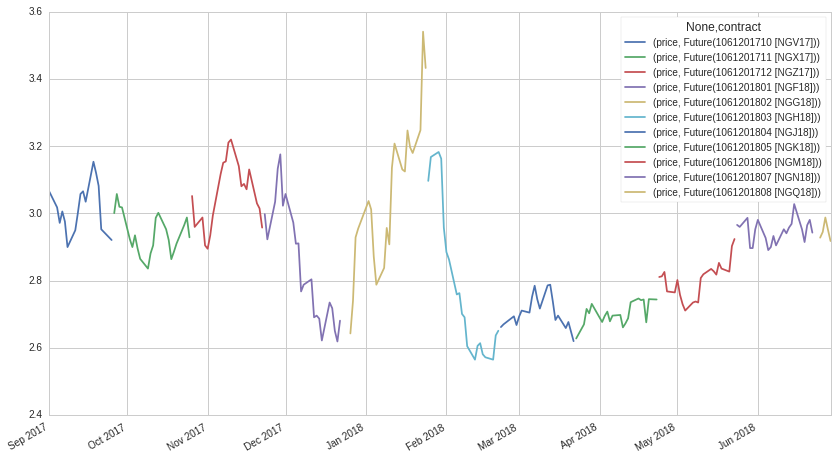

In [85]:
pivot_unadj.plot()

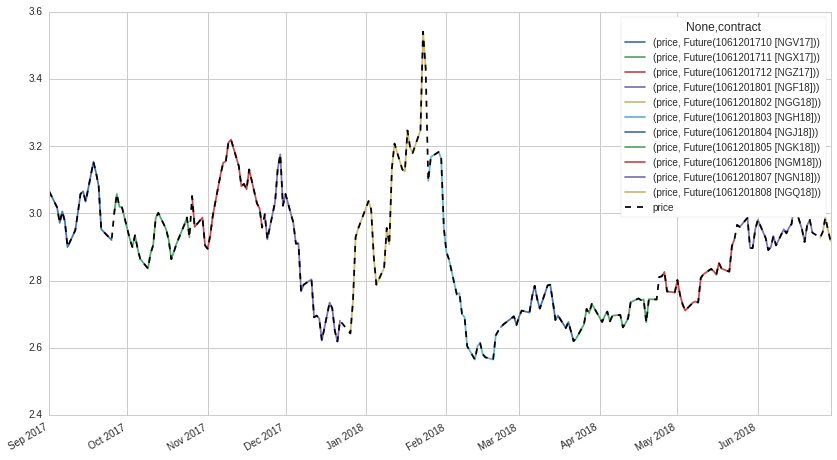

In [86]:
ax = pivot_unadj.plot()
ng_unadj_history.plot(ax=ax, ls='--', c='black')